In [1]:
import pandas as pd
import os 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
os.chdir('E:/Python/DAY4')

In [3]:
df =  pd.read_csv('dailysales.csv',parse_dates=['date'],index_col=['date']) 
#Parse_dates makes comp understand that its a date
#indexcol makes date as index column

In [4]:
df.head()

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0


In [5]:
df.shape

(704, 1)

### Resampling data STEP 2 (Making Montly sales)

In [6]:
ts=df["sales"].resample('M').sum() #dates will be displayed as month end #sum makees daily sales as monthly

In [7]:
ts.head()

date
2018-01-31     9035.0
2018-02-28     9571.0
2018-03-31    13143.0
2018-04-30    12427.0
2018-05-31     8133.0
Freq: M, Name: sales, dtype: float64

In [8]:
ts1=df["sales"].resample('MS').sum() #MS used for monthly start

In [9]:
ts1.head()

date
2018-01-01     9035.0
2018-02-01     9571.0
2018-03-01    13143.0
2018-04-01    12427.0
2018-05-01     8133.0
Freq: MS, Name: sales, dtype: float64

<AxesSubplot:xlabel='date'>

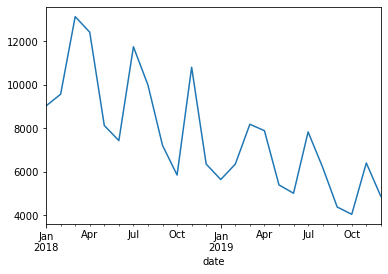

In [10]:
ts.plot()

# Stationary check

#### series having constant mean,variance and autocorelation it is stationary 

In [11]:
#series having no trend no seasonality ,it is stationary
#Null hypthess time series is non stationary
#Alternative hypthess time series is stationary
#df(P) test returns <0.05 ,reject null hypothesis,series is stationary

In [12]:
from statsmodels.tsa.stattools import adfuller
#adfuller os method & tsa=time series analysis

In [13]:
adftest=adfuller(ts)

In [14]:
print('p vale of ad fulller test is',adftest[1])

p vale of ad fulller test is 0.5351849899365444


#### as p value is gretaer than 0.05 we accept null hypothesis, which says series is non stationary

In [15]:
#we need to make series stationary then only we can do forecasting
#we dont remove trend and seasonality we do seperate them
#trend + seasonality +error

In [16]:
import statsmodels.api as sm

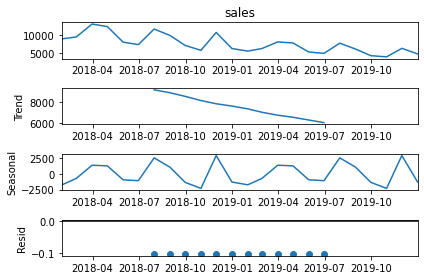

In [17]:
decomposition=sm.tsa.seasonal_decompose(ts,model='additive')
fig=decomposition.plot()
plt.show()

In [18]:
ts1=ts.diff()

<AxesSubplot:xlabel='date'>

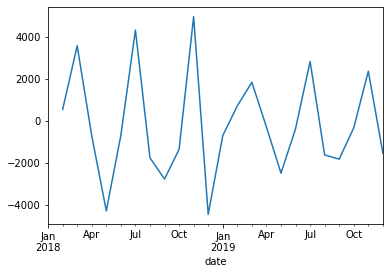

In [19]:
ts1.plot()

In [20]:
ts1

date
2018-01-31        NaN
2018-02-28     536.00
2018-03-31    3572.00
2018-04-30    -716.00
2018-05-31   -4294.00
2018-06-30    -696.00
2018-07-31    4321.00
2018-08-31   -1766.00
2018-09-30   -2776.00
2018-10-31   -1364.00
2018-11-30    4961.00
2018-12-31   -4458.00
2019-01-31    -710.65
2019-02-28     710.00
2019-03-31    1834.20
2019-04-30    -294.30
2019-05-31   -2496.85
2019-06-30    -384.60
2019-07-31    2824.50
2019-08-31   -1630.30
2019-09-30   -1827.75
2019-10-31    -335.80
2019-11-30    2363.50
2019-12-31   -1539.70
Freq: M, Name: sales, dtype: float64

In [21]:
ts2=ts1[1:,]  #remove 1st row as NA Value
ts2.head()

date
2018-02-28     536.0
2018-03-31    3572.0
2018-04-30    -716.0
2018-05-31   -4294.0
2018-06-30    -696.0
Freq: M, Name: sales, dtype: float64

In [22]:
adftest1=adfuller(ts2)
print('p value of ad fuller test is',adftest1[1])

p value of ad fuller test is 1.2875635261558588e-21


In [23]:
#p <0.05 reject Nul Hypo & time series is stationary

In [24]:
ts1

date
2018-01-31        NaN
2018-02-28     536.00
2018-03-31    3572.00
2018-04-30    -716.00
2018-05-31   -4294.00
2018-06-30    -696.00
2018-07-31    4321.00
2018-08-31   -1766.00
2018-09-30   -2776.00
2018-10-31   -1364.00
2018-11-30    4961.00
2018-12-31   -4458.00
2019-01-31    -710.65
2019-02-28     710.00
2019-03-31    1834.20
2019-04-30    -294.30
2019-05-31   -2496.85
2019-06-30    -384.60
2019-07-31    2824.50
2019-08-31   -1630.30
2019-09-30   -1827.75
2019-10-31    -335.80
2019-11-30    2363.50
2019-12-31   -1539.70
Freq: M, Name: sales, dtype: float64

### Train-test subset

In [25]:
len(ts)

24

In [26]:
ts

date
2018-01-31     9035.00
2018-02-28     9571.00
2018-03-31    13143.00
2018-04-30    12427.00
2018-05-31     8133.00
2018-06-30     7437.00
2018-07-31    11758.00
2018-08-31     9992.00
2018-09-30     7216.00
2018-10-31     5852.00
2018-11-30    10813.00
2018-12-31     6355.00
2019-01-31     5644.35
2019-02-28     6354.35
2019-03-31     8188.55
2019-04-30     7894.25
2019-05-31     5397.40
2019-06-30     5012.80
2019-07-31     7837.30
2019-08-31     6207.00
2019-09-30     4379.25
2019-10-31     4043.45
2019-11-30     6406.95
2019-12-31     4867.25
Freq: M, Name: sales, dtype: float64

In [27]:
train=ts[:18]
train

date
2018-01-31     9035.00
2018-02-28     9571.00
2018-03-31    13143.00
2018-04-30    12427.00
2018-05-31     8133.00
2018-06-30     7437.00
2018-07-31    11758.00
2018-08-31     9992.00
2018-09-30     7216.00
2018-10-31     5852.00
2018-11-30    10813.00
2018-12-31     6355.00
2019-01-31     5644.35
2019-02-28     6354.35
2019-03-31     8188.55
2019-04-30     7894.25
2019-05-31     5397.40
2019-06-30     5012.80
Freq: M, Name: sales, dtype: float64

In [28]:
test=ts[18:]
test

date
2019-07-31    7837.30
2019-08-31    6207.00
2019-09-30    4379.25
2019-10-31    4043.45
2019-11-30    6406.95
2019-12-31    4867.25
Freq: M, Name: sales, dtype: float64

In [29]:
print('train data',len(train))
print('test data',len(test))

train data 18
test data 6


### build ARIMA model on train data 

In [30]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
import warnings 
warnings.filterwarnings('ignore')

In [32]:
model=ARIMA(train,order=(5,0,4)).fit() #5,0,4 by  assuuming we start

In [33]:
len(train),(len(ts)-1)

(18, 23)

In [34]:
pred=model.predict(start=len(train),end=(len(ts)-1))

In [35]:
pred.head()

2019-07-31    8974.310767
2019-08-31    7441.929931
2019-09-30    4839.238589
2019-10-31    5466.022528
2019-11-30    8614.346258
Freq: M, Name: predicted_mean, dtype: float64

In [36]:
pred.tail()

2019-08-31    7441.929931
2019-09-30    4839.238589
2019-10-31    5466.022528
2019-11-30    8614.346258
2019-12-31    7775.235891
Freq: M, Name: predicted_mean, dtype: float64

### MODEL EVALUATION

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
error=np.sqrt(mean_squared_error(test,pred))
error

1750.339381351658

In [39]:
test.mean(),np.sqrt(test.var())

(5623.533333333333, 1447.190845281529)

<AxesSubplot:xlabel='date'>

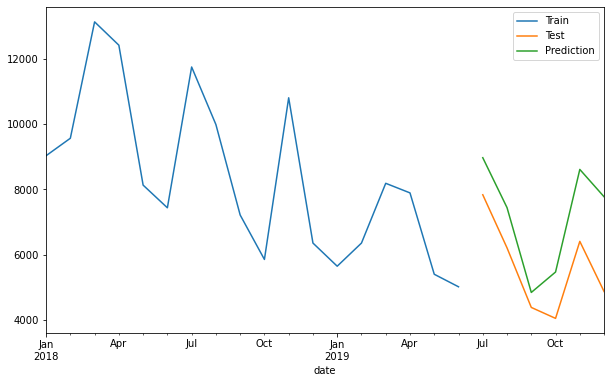

In [40]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='Prediction')

In [41]:
#our assumption for p ,d and q seems wrong

### Make model with orginal (full) data predict future data

In [42]:
final_model=ARIMA(ts,order=(5,0,4)).fit() #build on full dataset

In [43]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   24
Model:                 ARIMA(5, 0, 4)   Log Likelihood                -240.457
Date:                Tue, 18 Oct 2022   AIC                            502.914
Time:                        23:35:20   BIC                            515.873
Sample:                    01-31-2018   HQIC                           506.352
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7665.2043    382.203     20.055      0.000    6916.100    8414.308
ar.L1          1.9276      0.066     29.260      0.000       1.798       2.057
ar.L2         -1.9186      0.125    -15.376      0.000      -2.163      -1.674
ar.L3          1.9217      0.131     14.692      0.000       1.665       2.178
ar.L4         -0.9870      0.137     -7.192      0.000      -1.256      -0.718
ar.L5         -0.0047      0.071     -0.066      0.947      -0.144       0.134
ma.L1         -1.9263      0.298     -6.455      0.000      -2.511      -1.341
ma.L2          2.3757      0.185     12.868      0.000       2.014       2.738
ma.L3         -1.8857      0.531     -3.554      0.000      -2.925      -0.846
ma.L4          0.9758      0.097     10.046      0.000       0.785       1.166
sigma2      1.485e+05      0.010    1.5e+07      0.000    1.48e+05    1.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.32
Prob(Q):                              0.96   Prob(JB):                         0.19
Heteroskedasticity (H):               7.40   Skew:                            -0.69
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.77e+24. Standard errors may be unstable.
"""

In [44]:
prediction=final_model.predict(start=len(ts),end=(len(ts)+6))

In [45]:
prediction

2020-01-31    2390.237537
2020-02-29    2454.268466
2020-03-31    4565.947756
2020-04-30    3819.782342
2020-05-31    1405.022506
2020-06-30    2188.352079
2020-07-31    4812.746954
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='date'>

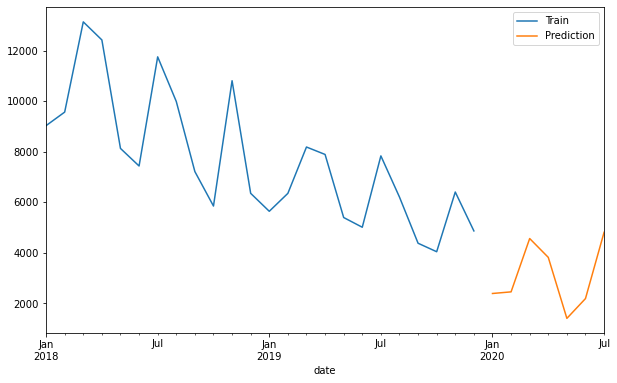

In [46]:
ts.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True,label='Prediction')

### method custom for loop to find p,q and q

In [47]:
import itertools

In [48]:
p=range(0,8) #for AR
q=range(0,8) #for MA
d=range(0,2) #generally not required more than 3 difference 0,1 & 2

In [49]:
p

range(0, 8)

In [50]:
pdq_combination=list(itertools.product(p,d,q))

In [51]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [52]:
len(pdq_combination)

128

In [53]:
rmse=[]
order1=[]

In [54]:
 for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue

In [55]:
results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

In [56]:
results.head()

,RMSE
"(0, 0, 0)",3025.859414
"(0, 0, 1)",3025.215172
"(0, 0, 2)",3015.073804
"(0, 0, 3)",3204.784860
"(0, 0, 4)",2628.708315


In [57]:
results['RMSE']

(0, 0, 0)    3025.859414
(0, 0, 1)    3025.215172
(0, 0, 2)    3015.073804
(0, 0, 3)    3204.784860
(0, 0, 4)    2628.708315
                ...     
(7, 1, 2)    3049.121255
(7, 1, 3)    1455.435329
(7, 1, 4)    4089.917065
(7, 1, 6)    1906.093444
(7, 1, 7)    1911.991223
Name: RMSE, Length: 109, dtype: float64

In [58]:
result_sort=results.sort_values('RMSE')

In [59]:
result_sort.head()

,RMSE
"(6, 0, 4)",1059.336590
"(4, 1, 3)",1157.380958
"(3, 1, 1)",1216.255343
"(5, 1, 2)",1239.487008
"(2, 1, 0)",1285.179845


In [60]:
result_sort.to_csv('ARIMA_result.csv')

In [61]:
##predicting with 6,0,4
model2=ARIMA(train,order=(6,0,4)).fit() ## assume p-6,q-0,d-4

In [62]:
import warnings
warnings.filterwarnings('ignore')
pred3=model2.predict(start=len(train),end=(len(ts)-1))
pred3.head()

2019-07-31    6321.790401
2019-08-31    5118.190729
2019-09-30    3996.546895
2019-10-31    3826.825992
2019-11-30    4800.741142
Freq: M, Name: predicted_mean, dtype: float64

In [63]:
##Model evaluation
from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(test, pred))
error

1911.9912225962478

<AxesSubplot:xlabel='date'>

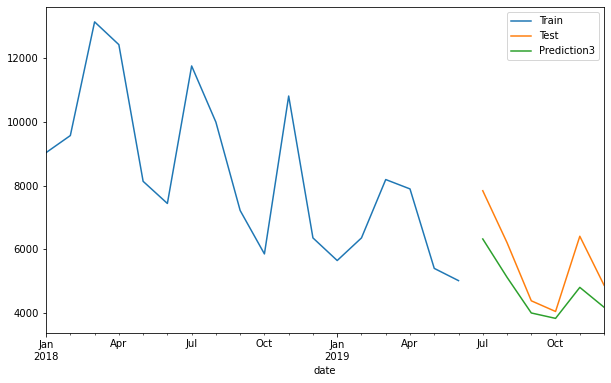

In [64]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred3.plot(legend=True,label='Prediction3')